# 5장 - 시각화를 이용한 이상값 식별

## 히스토그램으로 연속 변수 분포 조사
- 중심경향, 왜도(대칭성), 과잉 첨도, 확산 등 분포의 형태에 대한 명확한 그림 제공
- 통계적 검정에 있어 중요 -> 검정에서 변수의 분포에 대한 가정을 하는 경우가 많음
> 히스토그램 & 박스 플롯 -> 매우 기초, 기본!! 중요!

### 시각화 전 기술통계 산출

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

landtemps=pd.read_csv('C:/data-cleansing-main/Chapter05/data/landtemps2019avgs.csv')
covidtotals=pd.read_csv('C:/data-cleansing-main/Chapter05/data/covidtotals.csv',parse_dates=['lastdate'])
covidtotals.set_index('iso_code',inplace=True)

In [2]:
landtemps.describe()

,latabs,elevation,avgtemp
count,12095.000000,12095.000000,12095.000000
mean,40.466791,589.330211,11.193542
std,12.611377,761.973468,8.563443
min,0.017000,-350.000000,-60.821000
25%,34.510300,78.000000,5.417917
50%,40.670300,271.300000,10.450000
75%,46.750550,817.500000,16.919583
max,90.000000,9999.000000,33.930000


In [6]:
print(landtemps.skew())         # avgtemp가 -0.26이므로 왼쪽으로 치우쳐져 있다.
print(landtemps.kurtosis())     # avgtemp가 2.16으로 3보다 작으므로 정규분포보다 꼬리가 가늘다.

latabs      -0.292418
elevation    2.578364
avgtemp     -0.267838
dtype: float64
latabs        1.212855
elevation    15.144624
avgtemp       2.169831
dtype: float64


C:\Users\victo\AppData\Local\Temp\ipykernel_12728\2111059221.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(landtemps.skew())
C:\Users\victo\AppData\Local\Temp\ipykernel_12728\2111059221.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(landtemps.kurtosis())


### 평균 기온의 히스토그램 작성 & 전체 평균의 선 그리기

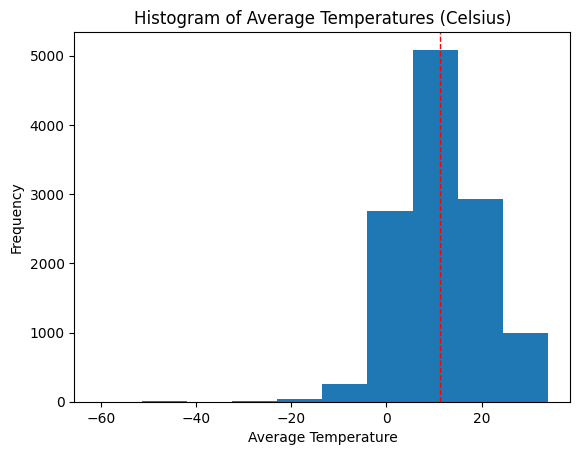

In [11]:
plt.hist(landtemps.avgtemp)
plt.axvline(landtemps.avgtemp.mean(),color='red',linestyle='dashed',linewidth=1)        # axvline?
plt.title("Histogram of Average Temperatures (Celsius)")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.show()

### 분위수-분위수 그림으로(qqplot) 정규분포를 벗어나는 지점 조사

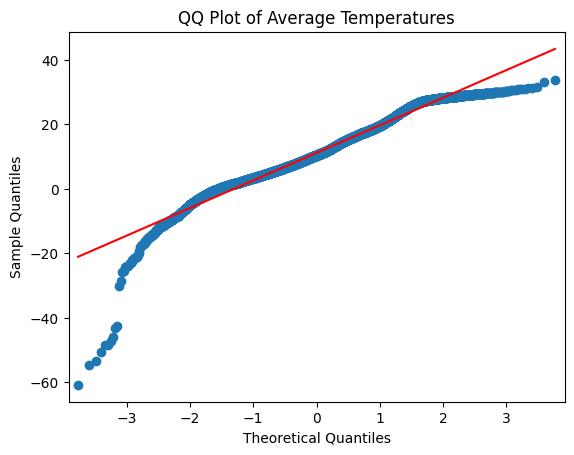

In [12]:
sm.qqplot(landtemps[['avgtemp']].sort_values(['avgtemp']),line='s')
plt.title("QQ Plot of Average Temperatures")
plt.show()

In [18]:
print(covidtotals.skew())
print(covidtotals.kurtosis())

total_cases         9.327371
total_deaths        8.126376
total_cases_pm      4.284485
total_deaths_pm     3.910966
population          8.720851
pop_density        11.000232
median_age          0.078403
gdp_per_capita      1.767441
hosp_beds           1.762791
dtype: float64
total_cases         99.150306
total_deaths        79.375510
total_cases_pm      26.137524
total_deaths_pm     19.442554
population          81.752289
pop_density        132.884625
median_age          -1.241149
gdp_per_capita       4.107206
hosp_beds            4.135578
dtype: float64


C:\Users\victo\AppData\Local\Temp\ipykernel_12728\4070048036.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(covidtotals.skew())
C:\Users\victo\AppData\Local\Temp\ipykernel_12728\4070048036.py:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(covidtotals.kurtosis())


### 코로나19 데이터의 스택 히스토그램 그리기
- 4개의 지역 선택

In [19]:
showregions=['Oceania / Aus','East Asia','Southern Africa','Western Europe'] 

def getcases(regiondesc):       # 지역 내 국가들의 total_cases_pm를 반환하는 함수 정의
    return covidtotals.loc[covidtotals.region==regiondesc,'total_cases_pm']

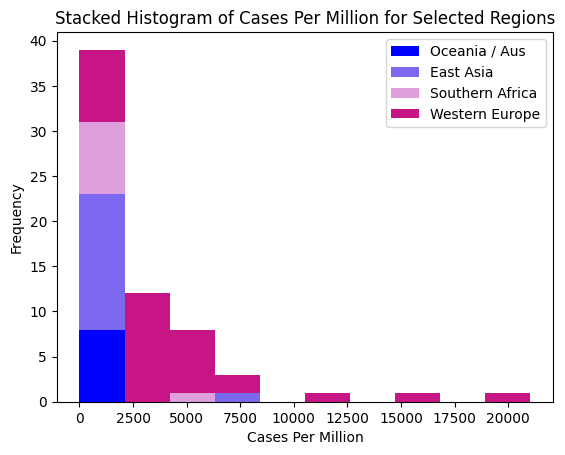

In [24]:
plt.hist([getcases(k) for k in showregions],                            # 국가들의 total_cases_pm 값을 리스트에 넣고
         color=['blue','mediumslateblue','plum','mediumvioletred'],     # 색깔 지정 후
         label=showregions, stacked=True)                               # stack옵션으로 쌓이게 한다
plt.title("Stacked Histogram of Cases Per Million for Selected Regions")
plt.xlabel("Cases Per Million")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 22500, step=2500))
plt.legend()
plt.show()

### 여러 개의 히스토그램을 하나의 그림으로 나타내기

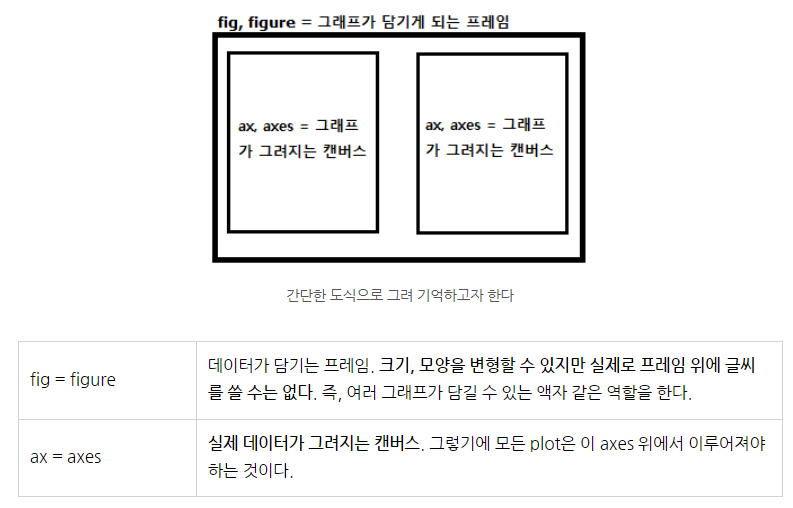

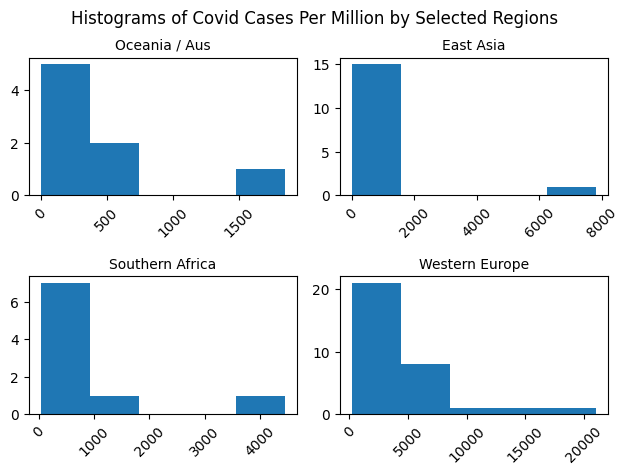

In [29]:
fig, axes=plt.subplots(2,2)
fig.suptitle("Histograms of Covid Cases Per Million by Selected Regions")
axes=axes.ravel()       # 뭐징
for j, ax in enumerate(axes):
    ax.hist(covidtotals.loc[covidtotals.region==showregions[j]].total_cases_pm,bins=5)
    ax.set_title(showregions[j],fontsize=10)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()